In [1]:
from bs4 import BeautifulSoup
# import xml.etree.ElementTree as et
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# xml_files = glob.glob('D:/MSc scriptie/Data/xml2/*.xml')
xml_files = glob.glob('../Data/Rijksmuseum/xml2/*.xml')
print(len(xml_files))
    

In [ ]:
xml_files[0]

In [ ]:
with open(xml_files[0], 'r', encoding="utf8") as f:
    data = f.read()
    
bs_data = BeautifulSoup(data, "xml")

In [ ]:
print(bs_data.prettify())
# bs_data

In [ ]:
# bs_data.find('metadata').find('identifier')
unordered_list = bs_data.find("metadata")
print(unordered_list)

In [ ]:
def remove_tags(bs_data, tag):
    node = bs_data.find('metadata').find(tag)
    if node:
        string = ''.join(node.stripped_strings)
    else:
        string = ':'
#     string = string.split(':')[1]
    return string

In [ ]:
creator = remove_tags(bs_data, 'creator').split(':')[1][1:]
creator

In [ ]:
identifier = remove_tags(bs_data, 'date')
identifier

In [ ]:
def create_df(xml_files):
    tags = []
    all_items = []
    
    for i in range(len(xml_files)):
        if i % 1000 == 0:
            print(str(round(i/len(xml_files)*100, 3)) + '%')
            
        with open(xml_files[i], 'r', encoding="utf8") as f:
            data = f.read()
            
        bs_data = BeautifulSoup(data, "xml")
        
        identifier = remove_tags(bs_data, 'identifier')
        creator = remove_tags(bs_data, 'creator').split(':')[1][1:]
        title = remove_tags(bs_data, 'title')
        date = remove_tags(bs_data, 'date')
        art_type = remove_tags(bs_data, 'type')
#         creators[identifier] = creator
        tags = [identifier, creator, title, date, art_type]
        all_items.append(tags)
        
    df = pd.DataFrame(all_items, columns=['Identifier', 'Creator', 'Title', 'Date', 'Type'])
#     return pd.DataFrame.from_dict(creators)
    return df
        

In [ ]:
# creators = create_df(xml_files)

In [ ]:
# creators

In [2]:
# creators.to_csv('xml_files.csv', index=False)
creators = pd.read_csv('../Data/Rijksmuseum/xml_files.csv')
creators

,Identifier,Creator,Title,Date,Type
0,SK-A-4878,"Everdingen, Caesar Boëtius van",Een jonge vrouw haar handen warmend boven een ...,1644 - 1648,schilderij
1,SK-A-4877,"Maris, Matthijs",Portret van Jacob Maris,1857 - 1857,schilderij
2,SK-A-4881,"Maes, Nicolaes","Portret van een jonge man, waarschijnlijk Simo...",1675 - 1685,schilderij
3,RP-P-1992-35,"Coornhert, Dirck Volckertsz",Keizer Karel V omgeven door zijn overwonnen te...,1555 - 1555,prent
4,RP-P-1992-36,"Coornhert, Dirck Volckertsz",Gevangename van Frans I tijdens de slag van Pa...,1555 - 1556,prent
...,...,...,...,...,...
112034,AK-RBK-14763-A-2,anoniem,Schotel beschilderd met lotusranken en een kra...,ca. 1700 - ca. 1725,schotel
112035,RP-P-OB-86.512,"Bos, Maarten",Beschieting van het Nederlandse oorlogsschip M...,1863 - 1863,prent
112036,NG-NM-7753,anoniem,Inktpot met deksel,ca. 1590 - ca. 1596,inktpot
112037,NG-NM-8358,"Coenraads, Jacobus (Senior)",Hartsvanger van Schout bij nacht J.A. Zoutman,1774 - 1790,hartsvanger


In [3]:
no_anons = creators[(creators['Creator'] != '') & (creators['Creator'] != 'anoniem')]
no_anons

,Identifier,Creator,Title,Date,Type
0,SK-A-4878,"Everdingen, Caesar Boëtius van",Een jonge vrouw haar handen warmend boven een ...,1644 - 1648,schilderij
1,SK-A-4877,"Maris, Matthijs",Portret van Jacob Maris,1857 - 1857,schilderij
2,SK-A-4881,"Maes, Nicolaes","Portret van een jonge man, waarschijnlijk Simo...",1675 - 1685,schilderij
3,RP-P-1992-35,"Coornhert, Dirck Volckertsz",Keizer Karel V omgeven door zijn overwonnen te...,1555 - 1555,prent
4,RP-P-1992-36,"Coornhert, Dirck Volckertsz",Gevangename van Frans I tijdens de slag van Pa...,1555 - 1556,prent
...,...,...,...,...,...
112004,RP-P-2011-173-1,"Fellmann, M.","Apostel Jacobus Maior, allegorie op tabak",ca. 1800 - ca. 1900,prent
112005,RP-T-1886-A-704-26,"Bramer, Leonaert",Berglandschap,1652 - 1653,tekening
112035,RP-P-OB-86.512,"Bos, Maarten",Beschieting van het Nederlandse oorlogsschip M...,1863 - 1863,prent
112037,NG-NM-8358,"Coenraads, Jacobus (Senior)",Hartsvanger van Schout bij nacht J.A. Zoutman,1774 - 1790,hartsvanger


In [4]:
# no_anons.to_csv('xml_files_no_anons.csv', index=False)
# creators.to_csv('xml_files.csv', index=False)

In [5]:
# test = creators[creators.Identifier == 'NG-NM-7753']['Creator']
no_anons.loc[no_anons.Identifier=='SK-A-4878','Creator'].values[0]

'Everdingen, Caesar Boëtius van'

In [6]:
unique_creators = creators['Creator'].unique()
len(unique_creators)

6622

In [8]:
grouped = no_anons.groupby('Creator').count()

grouped = grouped.sort_values('Title', ascending=False)
# selection = grouped
grouped = grouped.reset_index()
# grouped = grouped.drop([0, 11])
grouped.head(15)

,Creator,Identifier,Title,Date,Type
0,"Luyken, Jan",1928,1928,1928,1928
1,"Picart, Bernard",1504,1504,1504,1504
2,Rembrandt Harmensz. van Rijn,1384,1384,1384,1384
3,"Fokke, Simon",1267,1267,1267,1267
4,"Houbraken, Jacob",1148,1148,1148,1148
5,"Hooghe, Romeyn de",1119,1119,1119,1119
6,"Callot, Jacques",1013,1013,1013,1013
7,Meissener Porzellan Manufaktur,1003,1003,1003,1003
8,"Gheyn, Jacob de (II)",893,893,893,893
9,"Passe, Crispijn van de (I)",856,856,856,856


In [9]:
grouped.iloc[11]['Creator']

'Goltzius, Hendrick'

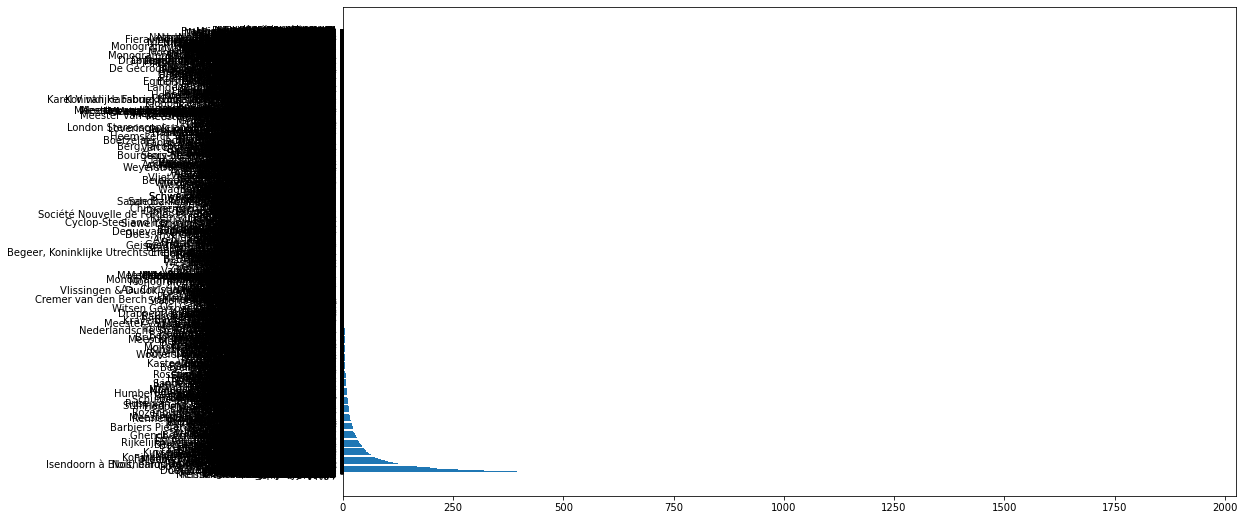

In [10]:
fig, ax = plt.subplots(figsize =(16, 9))
# plt.bar(selection['Creator'], selection['Title'])
ax.barh(grouped['Creator'], grouped['Title'])
plt.show()

In [11]:
frequents = grouped[grouped['Title'] >= 10]

In [12]:
frequents

,Creator,Identifier,Title,Date,Type
0,"Luyken, Jan",1928,1928,1928,1928
1,"Picart, Bernard",1504,1504,1504,1504
2,Rembrandt Harmensz. van Rijn,1384,1384,1384,1384
3,"Fokke, Simon",1267,1267,1267,1267
4,"Houbraken, Jacob",1148,1148,1148,1148
...,...,...,...,...,...
1191,"Wor, Dirk",10,10,10,10
1192,"Boissens, Cornelis Dircksz.",10,10,10,10
1193,"Maaten, Jacob Jan van der",10,10,10,10
1194,"Borduur, Jan",10,10,10,10


C:\Users\Lotte\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


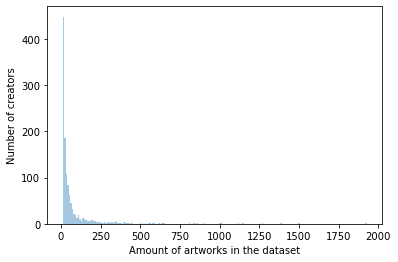

In [16]:
ax = sn.distplot(frequents['Title'], bins=200, hist=True, kde=False, rug=False)
ax.set(xlabel="Amount of artworks in the dataset", ylabel="Number of creators")
plt.show()